In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import csv
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
new_data = pd.read_csv('undemocracy/data/new_data.csv')
dataset = new_data[['Median Age', 'White', 'Black', 'AI/AN', 'PI', 'Other', 'Two Plus', 'Emp-LF Ratio', 'High School', 'Bachelor', 'Advanced', '% households w/ seniors', '% poverty', 'party_democrat', 'party_republican', 'inc_democrat', 'inc_republican', 'winner']]

In [4]:
dataset

,Median Age,White,Black,AI/AN,PI,Other,Two Plus,Emp-LF Ratio,High School,Bachelor,Advanced,% households w/ seniors,% poverty,party_democrat,party_republican,inc_democrat,inc_republican,winner
0,0.428044,0.641809,0.416794,0.038793,0.000000,0.013072,0.034615,0.407407,0.783529,0.247649,0.193443,0.437500,0.404130,0,1,0,1,1
1,0.428044,0.641809,0.416794,0.038793,0.000000,0.013072,0.034615,0.407407,0.783529,0.247649,0.193443,0.437500,0.404130,1,0,0,1,0
2,0.372694,0.605134,0.468702,0.012931,0.000000,0.019608,0.046154,0.419753,0.715294,0.217868,0.200000,0.413194,0.427729,0,1,0,1,1
3,0.372694,0.605134,0.468702,0.012931,0.000000,0.019608,0.046154,0.419753,0.715294,0.217868,0.200000,0.413194,0.427729,1,0,0,1,0
4,0.357934,0.671149,0.381679,0.008621,0.000000,0.017429,0.042308,0.404321,0.712941,0.208464,0.213115,0.378472,0.424779,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,0.446494,0.916870,0.013740,0.099138,0.000000,0.041394,0.050000,0.888889,0.905882,0.274295,0.173770,0.350694,0.171091,0,1,0,1,1
1205,0.335793,0.935208,0.009160,0.094828,0.008197,0.034858,0.069231,0.787037,0.920000,0.289969,0.229508,0.284722,0.200590,0,0,0,1,0
1206,0.335793,0.935208,0.009160,0.094828,0.008197,0.034858,0.069231,0.787037,0.920000,0.289969,0.229508,0.284722,0.200590,1,0,0,1,0
1207,0.335793,0.935208,0.009160,0.094828,0.008197,0.034858,0.069231,0.787037,0.920000,0.289969,0.229508,0.284722,0.200590,0,1,0,1,1


In [5]:
X = dataset.iloc[:,0:16]
Y = dataset.iloc[:,17]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0) #70:30 train-test-split

In [6]:
model = Sequential()
model.add(Dense(12, input_shape=(16,), activation='tanh'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(X_train, Y_train, epochs=150, batch_size=20, validation_split=0.2)

Epoch 1/150
34/34 [==============================] - 0s 1ms/step - loss: 0.2184 - accuracy: 0.9216 - val_loss: 0.2821 - val_accuracy: 0.9118
Epoch 2/150
34/34 [==============================] - 0s 752us/step - loss: 0.2175 - accuracy: 0.9246 - val_loss: 0.2807 - val_accuracy: 0.9118
Epoch 3/150
34/34 [==============================] - 0s 751us/step - loss: 0.2177 - accuracy: 0.9201 - val_loss: 0.2787 - val_accuracy: 0.9059
Epoch 4/150
34/34 [==============================] - 0s 760us/step - loss: 0.2182 - accuracy: 0.9260 - val_loss: 0.2788 - val_accuracy: 0.9118
Epoch 5/150
34/34 [==============================] - 0s 728us/step - loss: 0.2180 - accuracy: 0.9246 - val_loss: 0.2831 - val_accuracy: 0.9059
Epoch 6/150
34/34 [==============================] - 0s 756us/step - loss: 0.2176 - accuracy: 0.9201 - val_loss: 0.2806 - val_accuracy: 0.9118
Epoch 7/150
34/34 [==============================] - 0s 752us/step - loss: 0.2165 - accuracy: 0.9216 - val_loss: 0.2820 - val_accuracy: 0.9118
E

In [10]:
_, accuracy = model.evaluate(X_test, Y_test)

12/12 [==============================] - 0s 490us/step - loss: 0.2057 - accuracy: 0.9229


In [32]:
pred_probs = model.predict(X_test)
threshold = 0.5
y_pred = [1 if elem > threshold else 0 for elem in pred_probs]

12/12 [==============================] - 0s 482us/step


In [33]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[217,  14],
       [ 14, 118]])

In [34]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9228650137741047
Precision: 0.8939393939393939
Recall: 0.8939393939393939


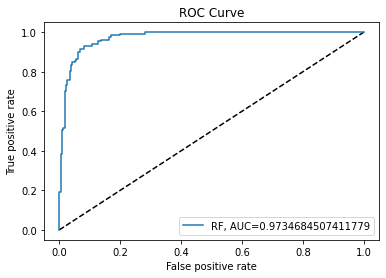

In [35]:
fpr_rf, tpr_rf, _ = metrics.roc_curve(Y_test, pred_probs)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
auc = metrics.roc_auc_score(Y_test, pred_probs)
plt.plot(fpr_rf, tpr_rf, label='RF, AUC=' + str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
metrics.auc(fpr_rf, tpr_rf)